# Diversity in the film industry: data exploration - Academy Awards

## 1. Importing libraries and dataset

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns

In [2]:
nominees = pd.read_csv('./data/nominees_clean.csv', index_col=0)

## 2. First analysis

- The dataset includes nominees for movies from 1928-2019, corresponding to ceremonies from 1927-2020.
- 'Film' has 304 null values
    - 86.8% correspond to special awards, not attributed to any film
    - 13.2% correspond to non-special awards, where a movie should be attributed. However, these only represent 0.39% of the total non-special awards. 
- There are a total 111 prize categories:
    - By number of winners, the most common are: honorary award, directing, film editing and actress/actor in a supporting role.
    - Out of the 111 categories, 6 are gendered: actress/actor, actress/actor in a supporting role, actress/actor in a supporting role.
    - Nominations for gendered categories represent 16,8% of the total nominations. 
- The 5 people with more nominations are *John Williams* (44), *Alfred Newman* (34), *Edith Head* (22), *Meryl Streep* (21) and *Victor Young* (19)
- The most nominated films are *A Star Is Born* (25), *Titanic* (16), *Mutiny on the Bounty* (15), *Moulin Rouge* (15) and *Cleopatra* (14).
- The film with more wins are *Titanic* (22), *The Lord of the Rings: The Return of the King* (11), *Ben-Hur* (11), *West Side Story* (10) and *The Last Emperor* (9).
- White men are clearly the most nominated, followed by white women




In [3]:
nominees.head()

,year_film,year_ceremony,ceremony,category,name,film,winner,female,black,asian,latin_american,non_white,gendered_cat
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False,False,False,False,False,False,True
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True,False,False,False,False,False,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False,True,False,False,False,False,True
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True,True,False,False,False,False,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False,True,False,False,False,False,True


In [4]:
print(f'Null values in film variable: {nominees.film.isna().sum()}\n')
print(nominees.info())

Null values in film variable: 304

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10395 entries, 0 to 10394
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year_film       10395 non-null  int64 
 1   year_ceremony   10395 non-null  int64 
 2   ceremony        10395 non-null  int64 
 3   category        10395 non-null  object
 4   name            10395 non-null  object
 5   film            10091 non-null  object
 6   winner          10395 non-null  bool  
 7   female          10395 non-null  bool  
 8   black           10395 non-null  bool  
 9   asian           10395 non-null  bool  
 10  latin_american  10395 non-null  bool  
 11  non_white       10395 non-null  bool  
 12  gendered_cat    10395 non-null  bool  
dtypes: bool(7), int64(3), object(3)
memory usage: 639.5+ KB
None


In [5]:
# finding for which categories we don't have value counts, in absolute value and in percentage
print(f' Percentage of special awards: {(0.407895+0.184211+0.148026+0.128289)*100}%')
print(f" Percentage of non-special awards with null values in 'film': {round((18+8+5+3+2+2+2)/(len(nominees)-(124+56+45+39))*100, 4)}%\n")
print(nominees.loc[nominees.film.isna()].category.value_counts())
print('\n')
print(nominees.loc[nominees.film.isna()].category.value_counts(normalize=True))

 Percentage of special awards: 86.8421%
 Percentage of non-special awards with null values in 'film': 0.3948%

HONORARY AWARD                          124
SPECIAL AWARD                            56
IRVING G. THALBERG MEMORIAL AWARD        45
JEAN HERSHOLT HUMANITARIAN AWARD         39
ASSISTANT DIRECTOR                       18
SOUND RECORDING                           8
HONORARY FOREIGN LANGUAGE FILM AWARD      5
SPECIAL ACHIEVEMENT AWARD                 3
SPECIAL FOREIGN LANGUAGE FILM AWARD       2
WRITING (Title Writing)                   2
ENGINEERING EFFECTS                       2
Name: category, dtype: int64


HONORARY AWARD                          0.407895
SPECIAL AWARD                           0.184211
IRVING G. THALBERG MEMORIAL AWARD       0.148026
JEAN HERSHOLT HUMANITARIAN AWARD        0.128289
ASSISTANT DIRECTOR                      0.059211
SOUND RECORDING                         0.026316
HONORARY FOREIGN LANGUAGE FILM AWARD    0.016447
SPECIAL ACHIEVEMENT AWARD      

In [6]:
nominees.describe()

,year_film,year_ceremony,ceremony
count,10395.000000,10395.000000,10395.000000
mean,1974.474555,1975.474555,47.500144
std,26.145642,26.145642,26.102352
min,1927.000000,1928.000000,1.000000
25%,1951.000000,1952.000000,24.000000
50%,1974.000000,1975.000000,47.000000
75%,1998.000000,1999.000000,71.000000
max,2019.000000,2020.000000,92.000000


In [7]:
len(nominees) # number of nominees

10395

In [8]:
len(nominees.loc[nominees.winner==True]) # number of winners

2357

In [9]:
# number of categories and categories with more prizes
print(f'Number of unique "categories": {len(nominees.category.unique())}\n')
print('Prizes given for each category:\n')
print(nominees.loc[nominees.winner==True].category.value_counts().head(20))

Number of unique "categories": 111

Prizes given for each category:

HONORARY AWARD                  124
DIRECTING                        91
FILM EDITING                     86
ACTOR IN A SUPPORTING ROLE       84
ACTRESS IN A SUPPORTING ROLE     84
DOCUMENTARY (Short Subject)      78
DOCUMENTARY (Feature)            77
CINEMATOGRAPHY                   66
FOREIGN LANGUAGE FILM            63
ART DIRECTION                    59
BEST PICTURE                     58
SPECIAL AWARD                    56
COSTUME DESIGN                   55
ACTRESS                          49
ACTOR                            49
SHORT FILM (Animated)            46
SHORT FILM (Live Action)         46
SOUND                            45
MUSIC (Original Score)           45
MUSIC (Original Song)            45
Name: category, dtype: int64


In [10]:
# percentage of gendered vs non_gendered categories
nominees.gendered_cat.value_counts(normalize=True)

False    0.831842
True     0.168158
Name: gendered_cat, dtype: float64

In [11]:
# top nominees by name
nominees.name.value_counts().head(20)

Metro-Goldwyn-Mayer              64
Walt Disney, Producer            59
John Williams                    44
Warner Bros.                     43
France                           37
Alfred Newman                    34
Italy                            27
Paramount                        25
Gordon Hollingshead, Producer    22
Edith Head                       22
RKO Radio                        22
Meryl Streep                     21
Spain                            20
20th Century-Fox                 20
Victor Young                     19
Woody Allen                      18
Leon Shamroy                     17
Max Steiner                      16
Pete Smith, Producer             16
Jerry Goldsmith                  16
Name: name, dtype: int64

In [12]:
# most nominated films
nominees.film.value_counts().head()

A Star Is Born          25
Titanic                 16
Mutiny on the Bounty    15
Moulin Rouge            15
Little Women            14
Name: film, dtype: int64

In [13]:
# most winning films
nominees.loc[nominees.winner==True].film.value_counts().head()

Titanic                                          12
Ben-Hur                                          11
The Lord of the Rings: The Return of the King    11
West Side Story                                  10
Gigi                                              9
Name: film, dtype: int64

In [14]:
# nominees by demographics
nominees[['female', 'black', 'asian', 'latin_american', 'non_white']].apply(pd.Series.value_counts)

,female,black,asian,latin_american,non_white
False,8106,10208,10261,10257,9943
True,2289,187,134,138,452


In [15]:
# nominees by race and gender
nominees.groupby('female')[['black', 'asian', 'latin_american', 'non_white']].sum()

,black,asian,latin_american,non_white
female,,,,
False,113.0,89.0,104.0,303.0
True,74.0,45.0,34.0,149.0


## 3. Focus on diversity in the Oscars

### 3.1. Creating dataframe to store demographics by year 

In [16]:
# add column 'white' to 'nominees' df to make it easier to compare after
def white(row):
    if row['black'] == True or row['asian'] == True or row['latin_american'] == True:
        return False
    else:
        return True

nominees['white'] = nominees.apply(lambda row: white(row), axis=1)
nominees.columns

Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film',
       'winner', 'female', 'black', 'asian', 'latin_american', 'non_white',
       'gendered_cat', 'white'],
      dtype='object')

#### Nominees by demographics by year (absolute value)

In [17]:
# creating new df to store the demographics of nominees by year
nominees_per_year = nominees.groupby('year_ceremony')[['female', 'black', 'asian', 'latin_american', 'non_white', 'white']].sum()

# adding 'total' variable to store total number of nominees
nominees_per_year['total'] = nominees_per_year['non_white'] + nominees_per_year['white']

# adding 'male' variable
nominees_per_year['male'] = nominees_per_year['total'] - nominees_per_year['female']

# renaming 'total' column
nominees_per_year.rename(columns={'total': 'total_nominees'}, inplace=True)

In [18]:
nominees_per_year.head()

,female,black,asian,latin_american,non_white,white,total_nominees,male
year_ceremony,,,,,,,,
1928,3.0,0.0,0.0,0.0,0.0,35.0,35.0,32.0
1929,8.0,0.0,0.0,0.0,0.0,38.0,38.0,30.0
1930,8.0,0.0,0.0,0.0,0.0,42.0,42.0,34.0
1931,5.0,0.0,0.0,1.0,1.0,43.0,44.0,39.0
1932,6.0,0.0,0.0,0.0,0.0,45.0,45.0,39.0


#### Nominees by demographics by year (percentage)

In [19]:
# getting percentage of each demographic by year
nominees_perc = nominees_per_year.div(nominees_per_year.total_nominees/100, axis=0)

# rounding to 2 decimal points
nominees_perc.round(2)

# exporting dataset
nominees_perc.to_csv('./data/nominees_per_year_perc.csv')

#### Winners by demographics by year (absolute value)

In [20]:
winners_per_year = nominees[nominees.winner==True].groupby('year_ceremony').sum()

In [21]:
# creating datafreame
winners_per_year = nominees[nominees.winner==True].groupby('year_ceremony').sum()

#droping unwanted categories
winners_per_year.drop('year_film', axis=1, inplace=True)
winners_per_year.drop('ceremony', axis=1, inplace=True)
winners_per_year.drop('gendered_cat', axis=1, inplace=True)

# renaming columns
winners_per_year.rename(columns={'winner': 'total_winners',
                                'female': 'female_winners',
                                'black': 'black_winners',
                                'asian': 'asian_winners',
                                'latin_american': 'latin_american_winners',
                                'non_white': 'non_white_winners',
                                'white': 'white_winners'}, 
                                inplace=True)

# adding 'male_winners' column
winners_per_year['male_winners'] = winners_per_year['total_winners'] - winners_per_year['female_winners']

In [22]:
# getting percentage of each demographic by year
winners_perc = winners_per_year.div(winners_per_year.total_winners/100, axis=0)

# rounding to 2 decimal points
winners_perc.round(2)

# exporting dataset
winners_perc.to_csv('./data/winners_per_year_perc.csv')

#### Nominees and winners by demographics by year (absolute value)

In [23]:
demographics = pd.merge(nominees_per_year, winners_per_year, how='left', on='year_ceremony')

# reordering columns
demographics = demographics[['female', 'black', 'asian', 'latin_american', 'non_white', 'white',
       'male', 'total_nominees', 'female_winners',
       'black_winners', 'asian_winners', 'latin_american_winners',
       'non_white_winners', 'white_winners', 'male_winners', 'total_winners']]

In [24]:
# exporting dataset
demographics.to_csv('./data/demographics.csv')

#### Nominees and winners by demographics by year  (% of total nomineess for all)

In [25]:
# getting percentage of each demographic by year
demographics_perc = demographics.div(demographics.total_nominees/100, axis=0)

# rounding to 2 decimal points
demographics_perc.round(2)

# exporting dataset
demographics_perc.to_csv('./data/demographics_percentage.csv')

#### Nominees and winners by demographics by year (% of total nomineess for nominees, % of total winners for winners)

In [26]:
# getting percentage of each demographic by year
demographics_perc_sep = pd.merge(nominees_perc, winners_perc, how='left', on='year_ceremony')

# rounding to 2 decimal points
demographics_perc_sep.round(2)

# exporting dataset
demographics_perc_sep.to_csv('./data/demographics_percentage_separated.csv')

### 3.2. Analyzing 'demographics' dataset

### 3.2.1. Nominees and winners by demographic as % of total nominees
- Men receive more nominations than women (78% vs 22%)
- White people receive more nominations than black people (95.8% vs 4.2%)
- In 13/92 ceremonies, all nominees were white. In 44/92 ceremonies, all winners were white. 

*People of Color (POC) includes black, asians and latin americans.*

In [27]:
# by year
demographics_perc

,female,black,asian,latin_american,non_white,white,male,total_nominees,female_winners,black_winners,asian_winners,latin_american_winners,non_white_winners,white_winners,male_winners,total_winners
year_ceremony,,,,,,,,,,,,,,,,
1928,8.571429,0.000000,0.000000,0.000000,0.000000,100.000000,91.428571,100.0,2.857143,0.000000,0.000000,0.000000,0.000000,42.857143,40.000000,42.857143
1929,21.052632,0.000000,0.000000,0.000000,0.000000,100.000000,78.947368,100.0,2.631579,0.000000,0.000000,0.000000,0.000000,18.421053,15.789474,18.421053
1930,19.047619,0.000000,0.000000,0.000000,0.000000,100.000000,80.952381,100.0,4.761905,0.000000,0.000000,0.000000,0.000000,19.047619,14.285714,19.047619
1931,11.363636,0.000000,0.000000,2.272727,2.272727,97.727273,88.636364,100.0,2.272727,0.000000,0.000000,0.000000,0.000000,20.454545,18.181818,20.454545
1932,13.333333,0.000000,0.000000,0.000000,0.000000,100.000000,86.666667,100.0,4.444444,0.000000,0.000000,0.000000,0.000000,31.111111,26.666667,31.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,37.096774,1.612903,3.225806,2.419355,7.258065,92.741935,62.903226,100.0,10.483871,0.806452,0.806452,1.612903,3.225806,18.548387,11.290323,21.774194
2017,34.920635,13.492063,2.380952,1.587302,17.460317,82.539683,65.079365,100.0,7.142857,3.174603,0.000000,0.000000,3.174603,19.047619,15.079365,22.222222
2018,38.582677,7.874016,3.149606,3.149606,14.173228,85.826772,61.417323,100.0,5.511811,1.574803,0.000000,1.574803,3.149606,19.685039,17.322835,22.834646


In [28]:
# total
demographics_perc.describe()

,female,black,asian,latin_american,non_white,white,male,total_nominees,female_winners,black_winners,asian_winners,latin_american_winners,non_white_winners,white_winners,male_winners,total_winners
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,22.000075,1.757551,1.237970,1.301372,4.231477,95.768523,77.999925,1.000000e+02,4.768313,0.432448,0.308252,0.355052,1.067978,22.088159,18.387823,23.156136
std,8.700429,2.420938,1.552632,1.703993,4.428752,4.428752,8.700429,7.448512e-15,2.313987,0.873019,0.557705,0.687169,1.589890,3.960234,4.120941,3.568432
min,7.692308,0.000000,0.000000,0.000000,0.000000,76.000000,56.250000,1.000000e+02,1.098901,0.000000,0.000000,0.000000,0.000000,12.000000,11.290323,14.285714
25%,15.223214,0.000000,0.000000,0.000000,1.181692,94.096500,70.167595,1.000000e+02,2.872559,0.000000,0.000000,0.000000,0.000000,20.120968,15.367290,22.131148
50%,20.099835,0.896879,0.892928,0.917431,2.945707,97.054293,79.900165,1.000000e+02,4.454365,0.000000,0.000000,0.000000,0.737247,22.222222,18.025402,23.138462
75%,29.832405,2.353051,1.818182,1.891285,5.903500,98.818308,84.776786,1.000000e+02,6.100305,0.787550,0.793651,0.781250,1.675937,23.827869,20.260565,24.213122
max,43.750000,13.492063,8.000000,10.434783,24.000000,100.000000,92.307692,1.000000e+02,10.483871,4.800000,3.200000,3.200000,10.400000,42.857143,40.000000,42.857143


In [29]:
# number of years with no nominees or winners of a certain demographic
demographics_perc.eq(0).sum().to_frame().T

,female,black,asian,latin_american,non_white,white,male,total_nominees,female_winners,black_winners,asian_winners,latin_american_winners,non_white_winners,white_winners,male_winners,total_winners
0,0,33,35,37,13,0,0,0,0,67,65,66,44,0,0,0


### 3.2.2. Nominees and winners by demographic as % of total nominees and total winners, respectively

In [30]:
# by year
demographics_perc_sep

,female,black,asian,latin_american,non_white,white,total_nominees,male,total_winners,female_winners,black_winners,asian_winners,latin_american_winners,non_white_winners,white_winners,male_winners
year_ceremony,,,,,,,,,,,,,,,,
1928,8.571429,0.000000,0.000000,0.000000,0.000000,100.000000,100.0,91.428571,100.0,6.666667,0.000000,0.000000,0.000000,0.000000,100.000000,93.333333
1929,21.052632,0.000000,0.000000,0.000000,0.000000,100.000000,100.0,78.947368,100.0,14.285714,0.000000,0.000000,0.000000,0.000000,100.000000,85.714286
1930,19.047619,0.000000,0.000000,0.000000,0.000000,100.000000,100.0,80.952381,100.0,25.000000,0.000000,0.000000,0.000000,0.000000,100.000000,75.000000
1931,11.363636,0.000000,0.000000,2.272727,2.272727,97.727273,100.0,88.636364,100.0,11.111111,0.000000,0.000000,0.000000,0.000000,100.000000,88.888889
1932,13.333333,0.000000,0.000000,0.000000,0.000000,100.000000,100.0,86.666667,100.0,14.285714,0.000000,0.000000,0.000000,0.000000,100.000000,85.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,37.096774,1.612903,3.225806,2.419355,7.258065,92.741935,100.0,62.903226,100.0,48.148148,3.703704,3.703704,7.407407,14.814815,85.185185,51.851852
2017,34.920635,13.492063,2.380952,1.587302,17.460317,82.539683,100.0,65.079365,100.0,32.142857,14.285714,0.000000,0.000000,14.285714,85.714286,67.857143
2018,38.582677,7.874016,3.149606,3.149606,14.173228,85.826772,100.0,61.417323,100.0,24.137931,6.896552,0.000000,6.896552,13.793103,86.206897,75.862069


In [31]:
# total
demographics_perc_sep.describe()

,female,black,asian,latin_american,non_white,white,total_nominees,male,total_winners,female_winners,black_winners,asian_winners,latin_american_winners,non_white_winners,white_winners,male_winners
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01,92.000000,9.200000e+01,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,22.000075,1.757551,1.237970,1.301372,4.231477,95.768523,1.000000e+02,77.999925,1.000000e+02,20.759526,1.893456,1.344390,1.550855,4.667584,95.332416,79.240474
std,8.700429,2.420938,1.552632,1.703993,4.428752,4.428752,7.448512e-15,8.700429,5.769592e-15,10.147325,3.841206,2.443342,3.048128,7.054437,7.054437,10.147325
min,7.692308,0.000000,0.000000,0.000000,0.000000,76.000000,1.000000e+02,56.250000,1.000000e+02,5.555556,0.000000,0.000000,0.000000,0.000000,53.571429,51.851852
25%,15.223214,0.000000,0.000000,0.000000,1.181692,94.096500,1.000000e+02,70.167595,1.000000e+02,12.500000,0.000000,0.000000,0.000000,0.000000,92.521368,73.076923
50%,20.099835,0.896879,0.892928,0.917431,2.945707,97.054293,1.000000e+02,79.900165,1.000000e+02,18.518519,0.000000,0.000000,0.000000,3.229167,96.770833,81.481481
75%,29.832405,2.353051,1.818182,1.891285,5.903500,98.818308,1.000000e+02,84.776786,1.000000e+02,26.923077,3.604497,3.571429,3.177083,7.478632,100.000000,87.500000
max,43.750000,13.492063,8.000000,10.434783,24.000000,100.000000,1.000000e+02,92.307692,1.000000e+02,48.148148,21.428571,14.285714,14.285714,46.428571,100.000000,94.444444


### 3.2.3. Gender distribution by year

- Both the percentage of female vs male nominees and the percentage of female vs male winners seem to be increasing over the years. 
- 2020 has been the year with the highest % of female nominees (43.8%).
- 2016 was the year with the highest % of female winners (48.1%).

*Nominees*

AxesSubplot(0.125,0.125;0.775x0.755)


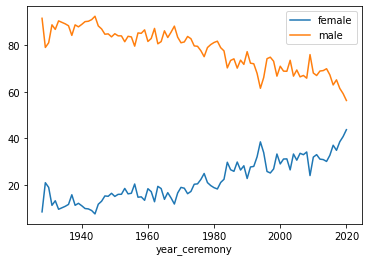

In [32]:
# percentage of male vs female nominees (out of total nominees)
print(demographics_perc[['female', 'male']].plot())

*Winners*

AxesSubplot(0.125,0.125;0.775x0.755)


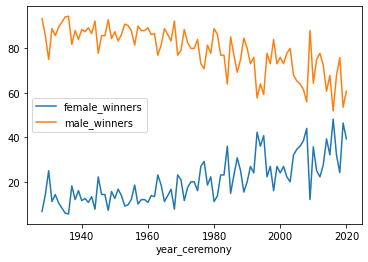

In [33]:
# percentage of male vs female winners (out of total winners)
print(demographics_perc_sep[['female_winners', 'male_winners']].plot())

*Evolution of % of female nominees vs winners*

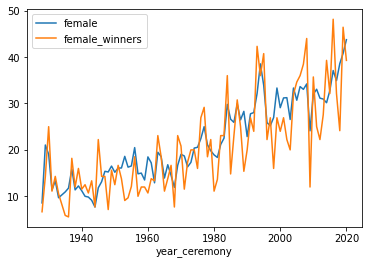

In [34]:
demographics_perc_sep[['female', 'female_winners']].plot()

### 3.2.4. Racial distribution by year

- Both the percentage of POC vs white nominees and the percentage of POC vs white winners seem to be increasing over the years, with a highest increase in the past 20 years.
- 2019 was the year with the highest % of POC nominees (24%).
- 2019 was also the year with the highest % of female winners (46%).

*Nominees*

In [35]:
demographics_perc_sep.tail()

,female,black,asian,latin_american,non_white,white,total_nominees,male,total_winners,female_winners,black_winners,asian_winners,latin_american_winners,non_white_winners,white_winners,male_winners
year_ceremony,,,,,,,,,,,,,,,,
2016,37.096774,1.612903,3.225806,2.419355,7.258065,92.741935,100.0,62.903226,100.0,48.148148,3.703704,3.703704,7.407407,14.814815,85.185185,51.851852
2017,34.920635,13.492063,2.380952,1.587302,17.460317,82.539683,100.0,65.079365,100.0,32.142857,14.285714,0.000000,0.000000,14.285714,85.714286,67.857143
2018,38.582677,7.874016,3.149606,3.149606,14.173228,85.826772,100.0,61.417323,100.0,24.137931,6.896552,0.000000,6.896552,13.793103,86.206897,75.862069
2019,40.800000,9.600000,8.000000,8.000000,24.000000,76.000000,100.0,59.200000,100.0,46.428571,21.428571,14.285714,14.285714,46.428571,53.571429,53.571429
2020,43.750000,2.343750,4.687500,3.906250,10.937500,89.062500,100.0,56.250000,100.0,39.285714,3.571429,3.571429,3.571429,10.714286,89.285714,60.714286


AxesSubplot(0.125,0.125;0.775x0.755)


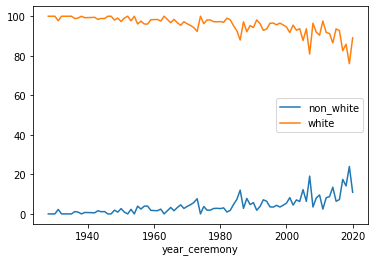

In [36]:
# percentage of white vs POC nominees (out of total nominees)
print(demographics_perc[['non_white', 'white']].plot())

*Winners*

AxesSubplot(0.125,0.125;0.775x0.755)


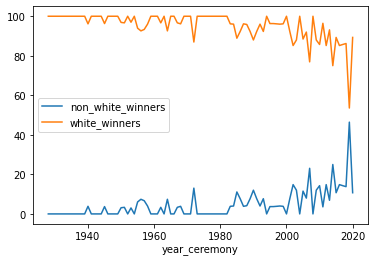

In [37]:
# percentage of white vs POC winners (out of total winners)
print(demographics_perc_sep[['non_white_winners', 'white_winners']].plot())

*Evolution of POC nominees vs winners*

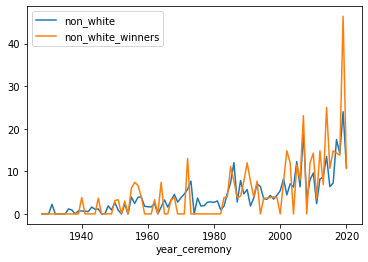

In [38]:
demographics_perc_sep[['non_white', 'non_white_winners']].plot()

### 3.3. Analyzing yearly increase of nominees and winners by gender and race

In this section I aim to analyze if growth in one category implicates growth/decrease in another. 

Results show a strong correlation between the total number of nominees and the number of white and male nominees.

In [39]:
# making copy of dataset
nominees_compare = nominees.copy()

In [40]:
# add male column
def male(row):
    if row['female'] == True:
        return False
    else:
        return True

nominees_compare['male'] = nominees_compare.apply(lambda row: male(row), axis=1)

In [41]:
# group by year
nominees_compare = nominees_compare.groupby('year_ceremony').sum()

In [42]:
# adding 'total' column
nominees_compare['total'] = nominees_compare['male'] + nominees_compare['female']

In [43]:
# keep only some columns
nominees_compare = nominees_compare[['female', 'black', 'asian',
       'latin_american', 'non_white', 'white', 'male', 'total']]

In [44]:
# compute growth rate 1 year and doing correlation
nominees_compare.pct_change().corr()

,female,black,asian,latin_american,non_white,white,male,total
female,1.000000,-0.107095,-0.157827,-0.296054,-0.277201,0.341749,-0.108908,0.312182
black,-0.107095,1.000000,-0.064545,0.010023,0.487373,-0.453463,0.135120,0.018655
asian,-0.157827,-0.064545,1.000000,-0.048978,0.281785,-0.187675,0.079458,-0.022410
latin_american,-0.296054,0.010023,-0.048978,1.000000,0.506670,-0.331185,0.161084,-0.027492
non_white,-0.277201,0.487373,0.281785,0.506670,1.000000,-0.462728,0.147684,-0.037398
white,0.341749,-0.453463,-0.187675,-0.331185,-0.462728,1.000000,0.712285,0.882543
male,-0.108908,0.135120,0.079458,0.161084,0.147684,0.712285,1.000000,0.874081
total,0.312182,0.018655,-0.022410,-0.027492,-0.037398,0.882543,0.874081,1.000000


### 3.3.1. Plots in absolute value

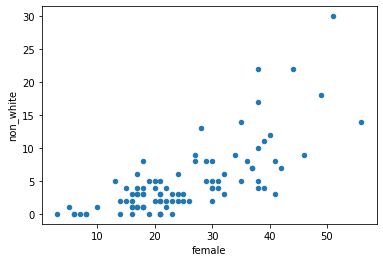

In [45]:
nominees_compare.plot.scatter('female', 'non_white')

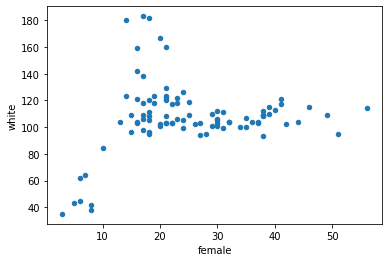

In [46]:
nominees_compare.plot.scatter('female', 'white')

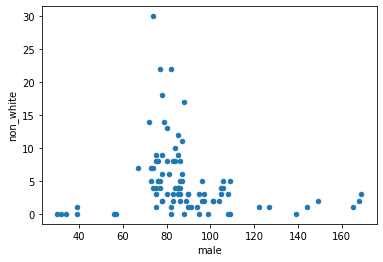

In [47]:
nominees_compare.plot.scatter('male', 'non_white')

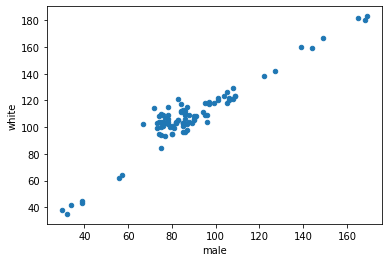

In [48]:
# si pujen white seran male, si pujen male seran tb white 
nominees_compare.plot.scatter('male', 'white')

### 3.4. Comparing nominees for gendered vs non-gendered categories

The categories of the Academy Awards can be grouped in gendered (i.e. actor/actress) and non-gendered (i.e. production). In this section I will analyze the demographics of the nominees by these two groups.

In [49]:
nominees.gendered_cat.value_counts() # there are 8647 not_gendered nominees and 1748 gendered_nominees

False    8647
True     1748
Name: gendered_cat, dtype: int64

### 3.4.1. Nominees for gendered category by gender and race

In [50]:
nominees_gendered = nominees.loc[nominees.gendered_cat==True]

In [51]:
nominees_gendered = nominees_gendered.groupby('year_ceremony', as_index=False).sum()
nominees_gendered['total'] = nominees_gendered['white'] + nominees_gendered['non_white']

In [52]:
dictionary = dict(nominees_gendered.sum())

In [53]:
mydict_gendered = {}

for key, value in dictionary.items():
    mydict_gendered[key] = value / dictionary['total'] *100
    
mydict_gendered = {k: mydict_gendered[k] for k in ('winner', 'female', 'black', 'asian', 'latin_american', 'non_white', 'white')}


### 3.4.2. Nominees for non-gendered category by gender and race

In [54]:
nominees_not_gendered = nominees.loc[nominees.gendered_cat==False]

In [55]:
nominees_not_gendered = nominees_not_gendered.groupby('year_ceremony', as_index=False).sum()
nominees_not_gendered['total'] = nominees_not_gendered['white'] + nominees_not_gendered['non_white']

In [56]:
dictionary = dict(nominees_not_gendered.sum())

In [57]:
mydict_not_gendered = {}

for key, value in dictionary.items():
    mydict_not_gendered[key] = value / dictionary['total'] *100
    
mydict_not_gendered = {k: mydict_not_gendered[k] for k in ('winner', 'female', 'black', 'asian', 'latin_american', 'non_white', 'white')}

### 3.4.3. Comparing results

The % of female and POC nominees is higher for gendered categories than for non-gendered categories:
- 50.6% female nominees in gendered categories vs 16.2% female nominees in non-gendered categories.
- 6.2% POP nominees in gendered categories vs 4.0% POC nominees in non-gendered categories. 

In [58]:
###### percentage of nominees by demographics for gendered categories
mydict_gendered

{'winner': 20.251716247139587,
 'female': 50.629290617848966,
 'black': 4.4050343249427915,
 'asian': 0.5148741418764302,
 'latin_american': 1.3729977116704806,
 'non_white': 6.2356979405034325,
 'white': 93.76430205949656}

In [59]:
# percentage of nominees by demographics for non-gendered categories
mydict_not_gendered

{'winner': 23.164103157164334,
 'female': 16.236845148606452,
 'black': 1.2721174973979414,
 'asian': 1.4455880652249335,
 'latin_american': 1.3183763154851393,
 'non_white': 3.9666936509772177,
 'white': 96.03330634902278}

In [88]:
# dataframe with nominees by gendered and non_gendered categories

nominees_cat = pd.DataFrame.from_dict(mydict_gendered, orient='index')
nominees_cat['non_gendered'] = pd.DataFrame.from_dict(mydict_not_gendered, orient='index')
nominees_cat.columns = ['gendered', 'non_gendered']
nominees_cat.drop(['winner', 'white'], inplace=True)

In [91]:
round(nominees_cat,2).to_csv('../project/data/nominees_by_categories.csv') # exporting csv

In [93]:
round(nominees_cat,2)

,gendered,non_gendered
female,50.63,16.24
black,4.41,1.27
asian,0.51,1.45
latin_american,1.37,1.32
non_white,6.24,3.97
